In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 定义导入,导出路径

folder_path = r"E:\Test\Inputs"

# 数据导入 WWTPs

file_WWTP = os.path.join(folder_path, "WWTP_corrected.xlsx")
df_WWTP = pd.read_excel(file_WWTP)

In [3]:
df_ReWater_Mon = df_WWTP.groupby(['Province', 'Statistical month'])['月处理水量（万m³）'].sum().div(100).reset_index() # million m3
df_ReWater_Mon.rename(columns={ '月处理水量（万m³）': 'Monthly_Water_Treatment_Volume'}, inplace=True)

df_Sludge_Mon = df_WWTP.groupby(['Province', 'Statistical month'])['含水率45%时的总污泥处理量（吨/月）'].sum().div(1000).reset_index() # thousand tonne
df_Sludge_Mon.rename(columns={ '含水率45%时的总污泥处理量（吨/月）': 'Monthly_Sludge_Amount'}, inplace=True)

In [8]:
df_ReWater_Mon

,Province,Statistical month,Monthly_Water_Treatment_Volume
0,Anhui,202001,222.1292
1,Anhui,202002,193.6030
2,Anhui,202003,217.9630
3,Anhui,202004,208.5876
4,Anhui,202005,218.4576
...,...,...,...
367,Zhejiang,202008,372.5547
368,Zhejiang,202009,377.9741
369,Zhejiang,202010,355.5687
370,Zhejiang,202011,338.3269


In [4]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df_ReWater_Mon['Month'] = df_ReWater_Mon['Statistical month'].apply(lambda x: month_map[int(str(x)[4:])])
df_ReWater_Mon.drop(columns=['Statistical month'],inplace=True)

df_Sludge_Mon['Month'] = df_Sludge_Mon['Statistical month'].apply(lambda x: month_map[int(str(x)[4:])])
df_Sludge_Mon.drop(columns=['Statistical month'],inplace=True)

In [5]:
df_region = pd.read_excel(r"E:\DATA\LEAP输入数据（京津冀、南方5省）\Province & Sector_Eng.xlsx")
region_grid = df_region.set_index('Province')['Region_grid'].to_dict()

custom_order = ['Northwest grid','East grid','North grid','Central grid','Northeast grid', 'South grid' ]

df_ReWater_Mon = df_ReWater_Mon[df_ReWater_Mon['Province'] != 'Tibet']
df_ReWater_Mon = df_ReWater_Mon.copy()
df_ReWater_Mon['region'] = df_ReWater_Mon['Province'].map(region_grid)
df_ReWater_Mon['region'] = pd.Categorical(df_ReWater_Mon['region'], categories=custom_order, ordered=True)
df_ReWater_Mon = df_ReWater_Mon.sort_values(['region', 'Province'])
df_ReWater_Mon.drop(columns='region',inplace=True)

df_Sludge_Mon = df_Sludge_Mon[df_Sludge_Mon['Province'] != 'Tibet']
df_Sludge_Mon = df_Sludge_Mon.copy()
df_Sludge_Mon['region'] = df_Sludge_Mon['Province'].map(region_grid)
df_Sludge_Mon['region'] = pd.Categorical(df_Sludge_Mon['region'], categories=custom_order, ordered=True)
df_Sludge_Mon = df_Sludge_Mon.sort_values(['region', 'Province'])
df_Sludge_Mon.drop(columns='region',inplace=True)

In [10]:
water_min = df_ReWater_Mon['Monthly_Water_Treatment_Volume'].max()
water_max = df_ReWater_Mon['Monthly_Water_Treatment_Volume'].min()
sludge_min = df_Sludge_Mon['Monthly_Sludge_Amount'].max()
sludge_max = df_Sludge_Mon['Monthly_Sludge_Amount'].min()
print(water_min,water_max,sludge_min,sludge_max)

868.9792 17.0476 206.66246642 4.093453916552537


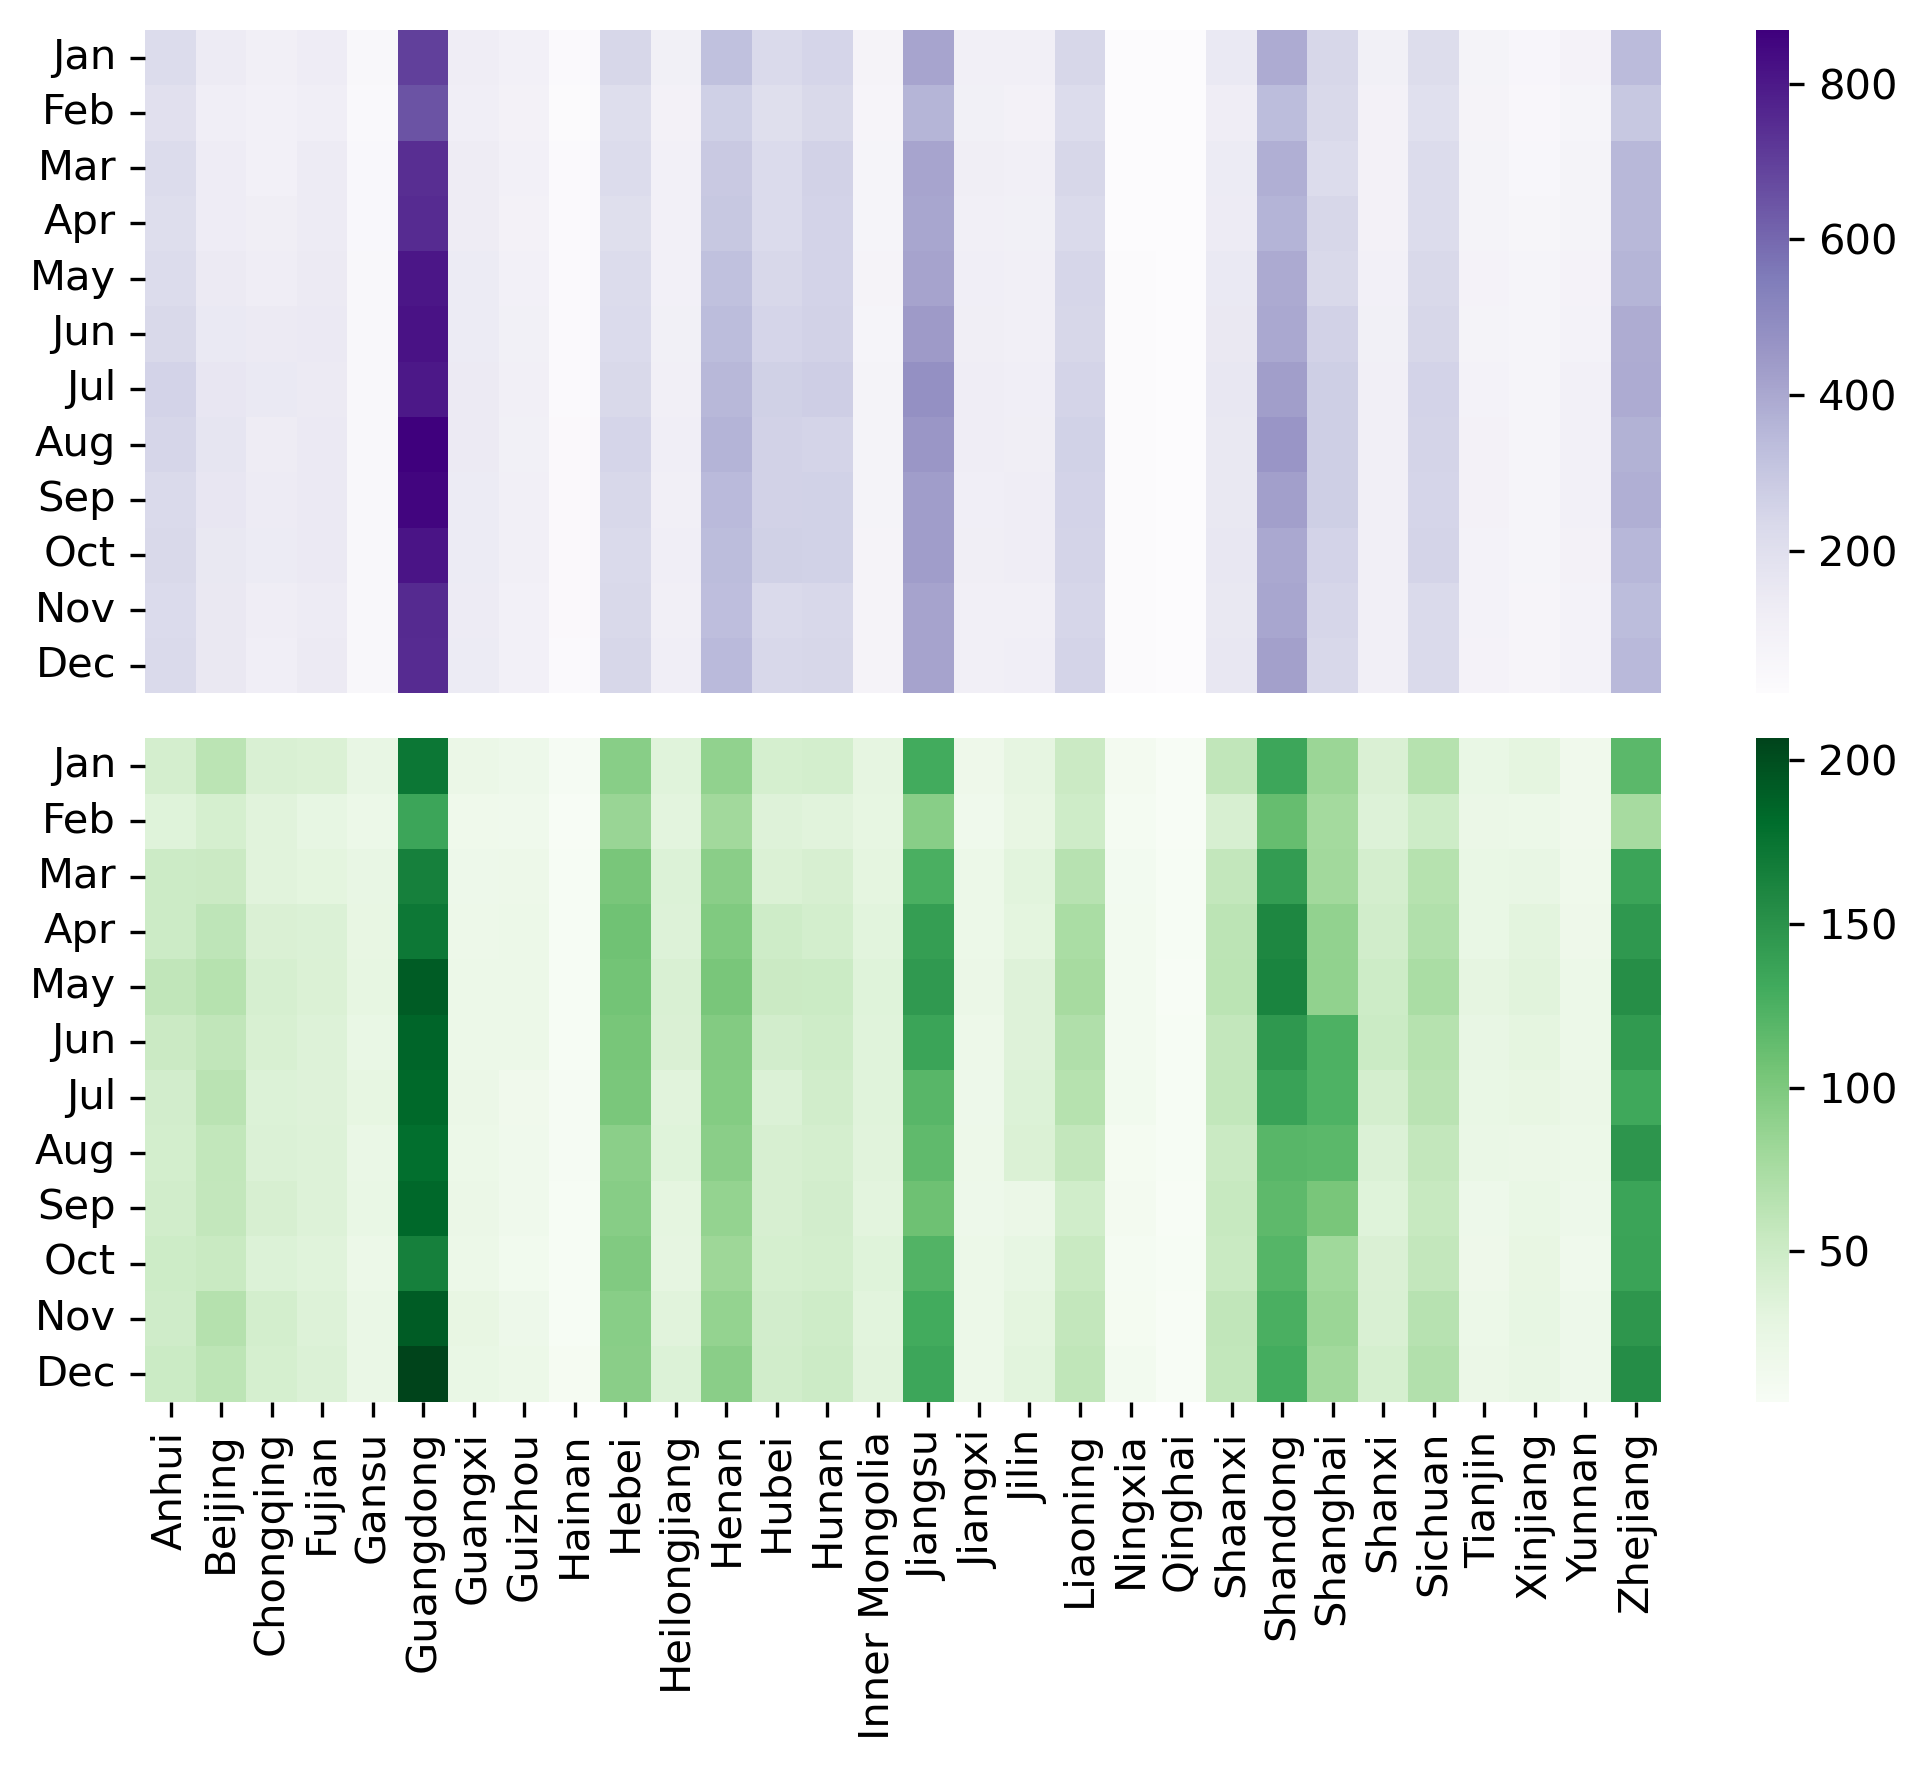

In [6]:
import seaborn as sns
df_water_Heatmap = df_ReWater_Mon.pivot(index='Month', columns='Province', values='Monthly_Water_Treatment_Volume')
df_water_Heatmap = df_water_Heatmap.reindex(index=list(month_map.values()))

df_sludge_Heatmap = df_Sludge_Mon.pivot(index='Month', columns='Province', values='Monthly_Sludge_Amount')
df_sludge_Heatmap = df_sludge_Heatmap.reindex(index=list(month_map.values()))

fig, axes = plt.subplots(2, 1, figsize=(7, 6), dpi=300)

# 绘制第一个热力图
heatmap0 = sns.heatmap(df_water_Heatmap, cmap="Purples", annot=False, ax=axes[0], xticklabels=False) #, cbar=False
axes[0].set_ylabel('') 
axes[0].set_xlabel('') 

# 绘制第二个热力图
heatmap1 = sns.heatmap(df_sludge_Heatmap, cmap="Greens", annot=False, ax=axes[1]) #, cbar=False
axes[1].set_ylabel('')
axes[1].set_xlabel('') 

# 调整图表布局
plt.tight_layout()
# plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/wastewater_treatement_industry.png", dpi=500)
plt.show()


In [45]:
water_min = df_ReWater_Mon['Monthly_Water_Treatment_Volume'].min()
water_max = df_ReWater_Mon['Monthly_Water_Treatment_Volume'].max()
sludge_min = df_Sludge_Mon['Monthly_Sludge_Amount'].min()
sludge_max = df_Sludge_Mon['Monthly_Sludge_Amount'].max()
print(water_min,water_max,sludge_min,sludge_max)

17.0476 868.9792 4.093453916552537 206.66246642
